# Dimensionality Reduction using an Autoencoder in Python 
Autoencoder (AE) and its advantages over PCA (a common dimensionality reduction technique).



<a id='task1'></a>
# Task 1: Importing and Introduction

In [42]:
import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import numpy as np

In [43]:
!pip3 install -U scikit-learn scipy matplotlib


Requirement already up-to-date: scikit-learn in c:\users\fiona\.conda\envs\tf\lib\site-packages (0.23.2)
Requirement already up-to-date: scipy in c:\users\fiona\.conda\envs\tf\lib\site-packages (1.5.3)
Requirement already up-to-date: matplotlib in c:\users\fiona\.conda\envs\tf\lib\site-packages (3.3.2)


In [44]:
import sklearn
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.neural_network import MLPRegressor
from sklearn.decomposition import PCA

from sklearn.metrics import mean_squared_error, silhouette_score

In [45]:
cols = ['#1FC17B', '#78FECF', '#555B6E', '#CC998D', '#429EA6',
        '#153B50', '#8367C7', '#EE6352', '#C287E8', '#F0A6CA', 
        '#521945', '#361F27', '#828489', '#9AD2CB', '#EBD494', 
        '#53599A', '#80DED9', '#EF2D56', '#446DF6', '#AF929D']

<a id='task2'></a>
# Task 2: Dataset Creation and Preprocessing

In [46]:
x,y=make_blobs(n_features=50,centers=20,n_samples=20000,cluster_std=0.2,center_box=[-1,1],random_state=17)

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=17)

In [75]:
x_test.shape

(2000, 50)

In [48]:
x_train[0]

array([-1.17358901, -0.68044383, -0.16415437,  0.37912141,  0.41057104,
       -0.00310461, -0.34076945,  0.57026494, -1.05066434, -1.03426613,
       -0.23620173,  0.95041835, -0.93118184,  0.78359945, -0.01041232,
        0.58501238, -1.27669457, -0.41620564,  0.09922647, -0.9569084 ,
       -0.70811597,  0.05026143,  0.1967055 , -0.22924749,  0.14050848,
        0.86689248, -0.19893363,  0.15008713, -0.88268157,  0.38489855,
        0.21877846, -0.58803256, -0.26512043, -0.85658477, -1.0040634 ,
       -0.56736465,  0.42889614, -1.03461437,  0.61507953,  0.83184756,
        0.0961693 ,  0.58300853,  0.08107896, -0.78648689,  0.67192332,
       -0.82520492, -0.82133345, -0.73547415, -0.5774646 , -0.75513366])

In [49]:
scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [50]:
x_train[0]#[0,1]

array([0.13481675, 0.28555197, 0.44805107, 0.64627624, 0.59576131,
       0.48453458, 0.35059505, 0.64726088, 0.18687352, 0.16567256,
       0.41880301, 0.78504359, 0.2178695 , 0.7704359 , 0.49939758,
       0.69256836, 0.09822267, 0.42050622, 0.53019966, 0.21021951,
       0.26001669, 0.52950709, 0.50491926, 0.47478711, 0.55185784,
       0.76213604, 0.46346446, 0.56059949, 0.23141354, 0.61885778,
       0.55893187, 0.25823475, 0.40697372, 0.23901437, 0.18117552,
       0.31043247, 0.64426644, 0.18418674, 0.75877341, 0.71428316,
       0.556052  , 0.65526293, 0.49180608, 0.23385424, 0.74938107,
       0.26519229, 0.26048168, 0.25948805, 0.32347424, 0.30981277])

<a id='task3'></a>
# Task 3: Baseline Model

In [88]:
pca=PCA(n_components=2)

In [89]:
pca.fit(x_train)

PCA(n_components=2)

In [90]:
o.shape

AttributeError: 'PCA' object has no attribute 'shape'

In [91]:
res_pca=pca.transform(x_test)

In [92]:
res_pca.shape

(2000, 2)

In [93]:
y_test.shape

(2000,)

In [94]:
unique_labels=np.unique(y_test)

In [95]:
unique_labels

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

Text(0, 0.5, 'component 2')

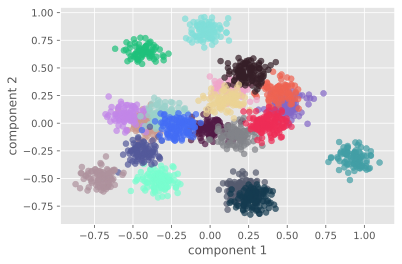

In [96]:
for index,unique_label in enumerate(unique_labels):
    x_data=res_pca[y_test==unique_label]
    plt.scatter(x_data[:,0],x_data[:,1],alpha=0.7,c=cols[index])

plt.xlabel('component 1')
plt.ylabel('component 2')



<a id='task4'></a>
# Task 4: Autoencoder Theory and Training
![title](Images/ae_viz.pdf)

In [60]:
autoencoder=MLPRegressor(alpha=1e-15,#learning rate 
                        hidden_layer_sizes=(50,100,50,2,50,100,50),
                        random_state=1,
                        max_iter=20000)

autoencoder.fit(x_train,x_train) #input x_train and output x_train

MLPRegressor(alpha=1e-15, hidden_layer_sizes=(50, 100, 50, 2, 50, 100, 50),
             max_iter=20000, random_state=1)

<a id='task5'></a>
# Task 5: Reducing Dimensionality with Encoder

In [62]:
weight=autoencoder.coefs_

In [63]:
bias=autoencoder.intercepts_

In [65]:
for w in weight:
    print(w.shape)

(50, 50)
(50, 100)
(100, 50)
(50, 2)
(2, 50)
(50, 100)
(100, 50)
(50, 50)


In [67]:
encoder_weights=weight[0:4]
encoder_bias=bias[0:4]

In [70]:
for b in bias:
    print(b.shape)

(50,)
(100,)
(50,)
(2,)
(50,)
(100,)
(50,)
(50,)


In [73]:
def encode(encoder_weights,encoder_bias,data):#loop over each encoder weights and encoder bias
    res_ae=data
    for index,(w,b) in enumerate(zip(encoder_weights,encoder_bias)):
        if index+1==len(encoder_weights):
            res_ae=res_ae@w+b
            
        else:
        
            res_ae=np.maximum(0,res_ae@w+b)
    
    return res_ae

res_ae=encode(encoder_weights,encoder_bias,x_test)

In [74]:
res_ae.shape

(2000, 2)

In [76]:
uniquelabels=np.unique(y_test)

In [77]:
uniquelabels

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

Text(0.5, 1.0, 'autoencoder results')

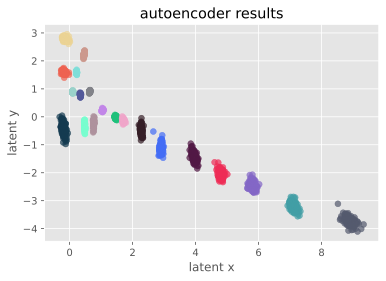

In [86]:
for index,unique_label in enumerate(uniquelabels):
    latent_space=res_ae[y_test==unique_label]
    
    plt.scatter(latent_space[:,0],latent_space[:,1],alpha=0.7,c=cols[index])
    
plt.xlabel('latent x')
plt.ylabel('latent y')
plt.title('autoencoder results')#cluster stronger, more independent , less interferance across different clusters

#autoencoder has better representation than PCA

In [97]:
#How well each object has been classified.
silhouette_score(x_test,y_test) #the higher the score, the better your clustering


0.6100948647899368

In [99]:
silhouette_score(res_pca,y_test) #make sense because theres lots of overlap


0.3678703359098863

In [100]:
silhouette_score(res_ae,y_test) #make sense because theres lots of overlap
# in terms of clustering, autoencoder has better representation of clusters than orginal data itself

0.8074659602032632

In [98]:
silhouette_score(x_train, y_train)

0.6109772034818249